In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import folium
from haversine import haversine, Unit
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('data/컬럼 재조정(고정값 추가제거)2.xlsx')
df

,Unnamed: 0,ID,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,전용면적,거래량1,거래금액(만원)_18/2,전세금(만원)_18/2,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수,위도,경도
0,0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,42166.7,4.162633,32.7,80,4,145000.0,45600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.483372,127.053437
1,1,서울특별시 강남구 개포동 개포주공1단지 40,145736.8,10166.7,16.507998,7.0,40,19,162587.5,10166.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.483381,127.057068
2,2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,42678.6,0.000000,31.2,60,3,129500.0,42818.2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,37.487868,127.068988
3,3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,45000.0,0.000000,25.4,80,0,177416.7,54333.3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,37.487868,127.068988
4,4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,37909.1,9.134234,30.1,50,3,128000.0,37500.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,37.488481,127.072502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,4294,서울특별시 중랑구 중화동 중화동건영아파트 60,25000.0,2500.0,6.000000,10.0,60,1,27000.0,22000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.605430,127.082936
4087,4295,서울특별시 중랑구 중화동 태능에셈빌 80,35000.0,15000.0,0.000000,42.9,80,3,36875.0,15000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.599447,127.078938
4088,4296,서울특별시 중랑구 중화동 한신아파트 50,31756.2,24571.4,0.000000,77.4,50,8,32190.0,25000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.595961,127.080314
4089,4297,서울특별시 중랑구 중화동 한신아파트 60,36534.6,28111.1,2.996064,76.9,60,26,38387.5,25600.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.595961,127.080314


In [8]:
del df['Unnamed: 0']

In [9]:
df.dropna(inplace=True)
df

,ID,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,전용면적,거래량1,거래금액(만원)_18/2,전세금(만원)_18/2,등락율.16,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수,위도,경도
2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,42678.6,0.000000,31.2,60,3,129500.0,42818.2,-5.5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,37.487868,127.068988
3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,45000.0,0.000000,25.4,80,0,177416.7,54333.3,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,37.487868,127.068988
4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,37909.1,9.134234,30.1,50,3,128000.0,37500.0,1.6,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,37.488481,127.072502
5,서울특별시 강남구 개포동 개포주공6단지 60,135200.0,43000.0,9.023669,31.8,60,2,131650.0,42475.0,-2.7,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,37.488481,127.072502
6,서울특별시 강남구 개포동 개포주공6단지 70,151500.0,50350.0,10.451045,33.2,70,2,150500.0,49888.9,-0.7,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,37.488481,127.072502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,서울특별시 중랑구 중화동 극동 80,36300.0,13000.0,13.223140,35.8,80,2,34125.0,13000.0,-6.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,37.604124,127.082326
4084,서울특별시 중랑구 중화동 동양엔파트 80,44000.0,37500.0,0.000000,85.2,80,4,45233.3,37500.0,2.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,37.594222,127.075432
4088,서울특별시 중랑구 중화동 한신아파트 50,31756.2,24571.4,0.000000,77.4,50,8,32190.0,25000.0,1.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.595961,127.080314
4089,서울특별시 중랑구 중화동 한신아파트 60,36534.6,28111.1,2.996064,76.9,60,26,38387.5,25600.0,4.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.595961,127.080314


In [10]:
where = df.iloc[:,124:126]
where

,위도,경도
2,37.487868,127.068988
3,37.487868,127.068988
4,37.488481,127.072502
5,37.488481,127.072502
6,37.488481,127.072502
...,...,...
4083,37.604124,127.082326
4084,37.594222,127.075432
4088,37.595961,127.080314
4089,37.595961,127.080314


In [14]:
gongtong = df.iloc[:,109:124]
gongtong

,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,세대당주차수,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
2,0.0,156.666667,24.736842,10.329670,0.693617,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
3,0.0,156.666667,24.736842,10.329670,0.693617,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
4,0.0,117.777778,26.500000,10.291262,1.037736,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
5,0.0,117.777778,26.500000,10.291262,1.037736,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
6,0.0,117.777778,26.500000,10.291262,1.037736,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,0.0,156.000000,19.500000,6.240000,0.461538,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4084,0.0,51.500000,6.058824,2.452381,1.708738,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4088,0.0,171.555556,35.090909,13.310345,0.970855,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
4089,0.0,171.555556,35.090909,13.310345,0.970855,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0


In [16]:
df.iloc[:,1:7]

,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,전용면적,거래량1
2,136666.7,42678.6,0.000000,31.2,60,3
3,177416.7,45000.0,0.000000,25.4,80,0
4,125900.0,37909.1,9.134234,30.1,50,3
5,135200.0,43000.0,9.023669,31.8,60,2
6,151500.0,50350.0,10.451045,33.2,70,2
...,...,...,...,...,...,...
4083,36300.0,13000.0,13.223140,35.8,80,2
4084,44000.0,37500.0,0.000000,85.2,80,4
4088,31756.2,24571.4,0.000000,77.4,50,8
4089,36534.6,28111.1,2.996064,76.9,60,26


In [17]:
dic = {}
num = 1

for i1 in range(1,19):
    dic[f'data{i1}'] = df.iloc[:,num:num+6]
    dic[f'data{i1}'] = pd.concat([dic[f'data{i1}'],gongtong], axis=1)
    num += 6

dic['data1']

,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,전용면적,거래량1,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,...,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
2,136666.7,42678.6,0.000000,31.2,60,3,0.0,156.666667,24.736842,10.329670,...,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
3,177416.7,45000.0,0.000000,25.4,80,0,0.0,156.666667,24.736842,10.329670,...,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
4,125900.0,37909.1,9.134234,30.1,50,3,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
5,135200.0,43000.0,9.023669,31.8,60,2,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
6,151500.0,50350.0,10.451045,33.2,70,2,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,36300.0,13000.0,13.223140,35.8,80,2,0.0,156.000000,19.500000,6.240000,...,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4084,44000.0,37500.0,0.000000,85.2,80,4,0.0,51.500000,6.058824,2.452381,...,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4088,31756.2,24571.4,0.000000,77.4,50,8,0.0,171.555556,35.090909,13.310345,...,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
4089,36534.6,28111.1,2.996064,76.9,60,26,0.0,171.555556,35.090909,13.310345,...,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0


In [18]:
dic['data18']

,거래금액(만원)_22/2,전세금(만원)_22/2,등락율,전세가율,전용면적.17,거래량18,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,...,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
2,202800.0,44265.0,0.0,21.8,60,0,0.0,156.666667,24.736842,10.329670,...,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
3,282250.0,62400.0,0.0,22.1,80,0,0.0,156.666667,24.736842,10.329670,...,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
4,189000.0,43116.7,0.0,22.8,50,0,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
5,181000.0,39239.8,0.0,21.7,60,0,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
6,270000.0,57225.0,0.0,21.2,70,0,0.0,117.777778,26.500000,10.291262,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,56933.3,47500.0,0.0,83.4,80,0,0.0,156.000000,19.500000,6.240000,...,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4084,78800.0,35000.0,0.0,44.4,80,0,0.0,51.500000,6.058824,2.452381,...,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4088,70000.0,37000.0,0.0,52.9,50,0,0.0,171.555556,35.090909,13.310345,...,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
4089,73000.0,36116.8,0.0,49.5,60,0,0.0,171.555556,35.090909,13.310345,...,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0


In [19]:
dic['data1'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 2 to 4090
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   거래금액(만원)_18/1  3227 non-null   float64
 1   전세금(만원)_18/1   3227 non-null   float64
 2   등락율18/1        3227 non-null   float64
 3   전세가율18/1       3227 non-null   float64
 4   전용면적           3227 non-null   int64  
 5   거래량1           3227 non-null   int64  
 6   거래허가제TF        3227 non-null   float64
 7   동당세대수          3227 non-null   float64
 8   관리원당세대수        3227 non-null   float64
 9   승강기당세대수        3227 non-null   float64
 10  세대당주차수         3227 non-null   float64
 11  연간소독횟수         3227 non-null   float64
 12  개별난방TF         3227 non-null   float64
 13  중앙난방TF         3227 non-null   float64
 14  지역난방TF         3227 non-null   float64
 15  복도식TF          3227 non-null   float64
 16  혼합형TF          3227 non-null   float64
 17  계단식TF          3227 non-null   float64
 18  메이저시공사TF

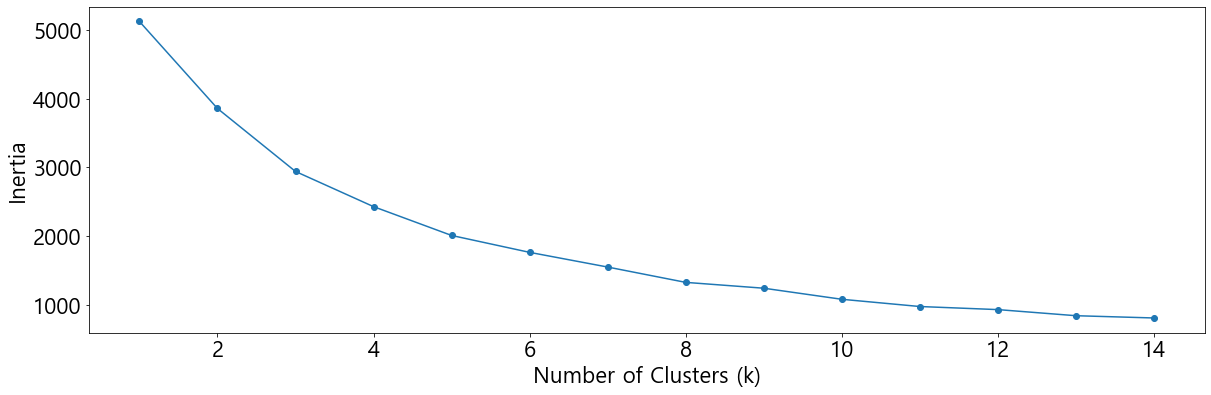

In [20]:
mm = MinMaxScaler()
mm_scaled = mm.fit_transform(dic['data1'])
samples = pd.DataFrame(mm_scaled)

num_clusters = list(range(1, 15))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [25]:
# 스케일링과 클러스터링
mm = MinMaxScaler()
mm_scaled1 = mm.fit_transform(dic['data1'])
mm_scaled2 = mm.fit_transform(dic['data2'])
mm_scaled3 = mm.fit_transform(dic['data3'])
mm_scaled4 = mm.fit_transform(dic['data4'])
mm_scaled5 = mm.fit_transform(dic['data5'])
mm_scaled6 = mm.fit_transform(dic['data6'])
mm_scaled7 = mm.fit_transform(dic['data7'])
mm_scaled8 = mm.fit_transform(dic['data8'])
mm_scaled9 = mm.fit_transform(dic['data9'])
mm_scaled10 = mm.fit_transform(dic['data10'])
mm_scaled11 = mm.fit_transform(dic['data11'])
mm_scaled12 = mm.fit_transform(dic['data12'])
mm_scaled13 = mm.fit_transform(dic['data13'])
mm_scaled14 = mm.fit_transform(dic['data14'])
mm_scaled15 = mm.fit_transform(dic['data15'])
mm_scaled16 = mm.fit_transform(dic['data16'])
mm_scaled17 = mm.fit_transform(dic['data17'])
mm_scaled18 = mm.fit_transform(dic['data18'])

kmeans = KMeans(n_clusters=11, init='k-means++', random_state=np.random.RandomState(seed=1))

clusters1 = kmeans.fit(mm_scaled1)
dic['data1']['cluster'] = clusters1.labels_
clusters2 = kmeans.predict(mm_scaled2)
dic['data2']['cluster'] = clusters2
clusters3 = kmeans.predict(mm_scaled3)
dic['data3']['cluster'] = clusters3
clusters4 = kmeans.predict(mm_scaled4)
dic['data4']['cluster'] = clusters4
clusters5 = kmeans.predict(mm_scaled5)
dic['data5']['cluster'] = clusters5
clusters6 = kmeans.predict(mm_scaled6)
dic['data6']['cluster'] = clusters6
clusters7 = kmeans.predict(mm_scaled7)
dic['data7']['cluster'] = clusters7
clusters8 = kmeans.predict(mm_scaled8)
dic['data8']['cluster'] = clusters8
clusters9 = kmeans.predict(mm_scaled9)
dic['data9']['cluster'] = clusters9
clusters10 = kmeans.predict(mm_scaled10)
dic['data10']['cluster'] = clusters10
clusters11 = kmeans.predict(mm_scaled11)
dic['data11']['cluster'] = clusters11
clusters12 = kmeans.predict(mm_scaled12)
dic['data12']['cluster'] = clusters12
clusters13 = kmeans.predict(mm_scaled13)
dic['data13']['cluster'] = clusters13
clusters14 = kmeans.predict(mm_scaled14)
dic['data14']['cluster'] = clusters14
clusters15 = kmeans.predict(mm_scaled15)
dic['data15']['cluster'] = clusters15
clusters16 = kmeans.predict(mm_scaled16)
dic['data16']['cluster'] = clusters16
clusters17 = kmeans.predict(mm_scaled17)
dic['data17']['cluster'] = clusters17
clusters18 = kmeans.predict(mm_scaled18)
dic['data18']['cluster'] = clusters18

In [26]:
dic['data1'].groupby('cluster').count()

,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,전용면적,거래량1,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,...,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
cluster,,,,,,,,,,,,,,,,,,,,,
0,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
1,477,477,477,477,477,477,477,477,477,477,...,477,477,477,477,477,477,477,477,477,477
2,276,276,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,276,276
3,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
4,600,600,600,600,600,600,600,600,600,600,...,600,600,600,600,600,600,600,600,600,600
5,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
6,263,263,263,263,263,263,263,263,263,263,...,263,263,263,263,263,263,263,263,263,263
7,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
8,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [27]:
dic['data9'].groupby('cluster').count()

,거래금액(만원)_20/1,전세금(만원)_20/1,등락율.9,전세가율.9,전용면적.8,거래량9,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,...,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
cluster,,,,,,,,,,,,,,,,,,,,,
0,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
1,477,477,477,477,477,477,477,477,477,477,...,477,477,477,477,477,477,477,477,477,477
2,276,276,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,276,276
3,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
4,600,600,600,600,600,600,600,600,600,600,...,600,600,600,600,600,600,600,600,600,600
5,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
6,263,263,263,263,263,263,263,263,263,263,...,263,263,263,263,263,263,263,263,263,263
7,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
8,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [28]:
dic['data18'].groupby('cluster').count()

,거래금액(만원)_22/2,전세금(만원)_22/2,등락율,전세가율,전용면적.17,거래량18,거래허가제TF,동당세대수,관리원당세대수,승강기당세대수,...,연간소독횟수,개별난방TF,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,철근철골구조TF,관리시설수
cluster,,,,,,,,,,,,,,,,,,,,,
0,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
1,477,477,477,477,477,477,477,477,477,477,...,477,477,477,477,477,477,477,477,477,477
2,276,276,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,276,276
3,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
4,596,596,596,596,596,596,596,596,596,596,...,596,596,596,596,596,596,596,596,596,596
5,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
6,263,263,263,263,263,263,263,263,263,263,...,263,263,263,263,263,263,263,263,263,263
7,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
8,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [29]:
ID = df.iloc[:,0]
ID

2       서울특별시 강남구 개포동 개포주공5단지 60
3       서울특별시 강남구 개포동 개포주공5단지 80
4       서울특별시 강남구 개포동 개포주공6단지 50
5       서울특별시 강남구 개포동 개포주공6단지 60
6       서울특별시 강남구 개포동 개포주공6단지 70
                  ...           
4083         서울특별시 중랑구 중화동 극동 80
4084      서울특별시 중랑구 중화동 동양엔파트 80
4088      서울특별시 중랑구 중화동 한신아파트 50
4089      서울특별시 중랑구 중화동 한신아파트 60
4090      서울특별시 중랑구 중화동 한신아파트 80
Name: ID, Length: 3227, dtype: object

In [30]:
dic['data1'].set_index(ID, inplace=True)
dic['data1'] = dic['data1']['cluster']

dic['data2'].set_index(ID, inplace=True)
dic['data2'] = dic['data2']['cluster']

dic['data3'].set_index(ID, inplace=True)
dic['data3'] = dic['data3']['cluster']

dic['data4'].set_index(ID, inplace=True)
dic['data4'] = dic['data4']['cluster']

dic['data5'].set_index(ID, inplace=True)
dic['data5'] = dic['data5']['cluster']

dic['data6'].set_index(ID, inplace=True)
dic['data6'] = dic['data6']['cluster']

dic['data7'].set_index(ID, inplace=True)
dic['data7'] = dic['data7']['cluster']

dic['data8'].set_index(ID, inplace=True)
dic['data8'] = dic['data8']['cluster']

dic['data9'].set_index(ID, inplace=True)
dic['data9'] = dic['data9']['cluster']

dic['data10'].set_index(ID, inplace=True)
dic['data10'] = dic['data10']['cluster']

dic['data11'].set_index(ID, inplace=True)
dic['data11'] = dic['data11']['cluster']

dic['data12'].set_index(ID, inplace=True)
dic['data12'] = dic['data12']['cluster']

dic['data13'].set_index(ID, inplace=True)
dic['data13'] = dic['data13']['cluster']

dic['data14'].set_index(ID, inplace=True)
dic['data14'] = dic['data14']['cluster']

dic['data15'].set_index(ID, inplace=True)
dic['data15'] = dic['data15']['cluster']

dic['data16'].set_index(ID, inplace=True)
dic['data16'] = dic['data16']['cluster']

dic['data17'].set_index(ID, inplace=True)
dic['data17'] = dic['data17']['cluster']

dic['data18'].set_index(ID, inplace=True)
dic['data18'] = dic['data18']['cluster']

In [31]:
where.set_index(ID, inplace=True)

In [32]:
address = pd.concat([dic['data1'],dic['data2'],dic['data3'],dic['data4'],dic['data5'],dic['data6'],dic['data7'],dic['data8'],dic['data9'],dic['data10'],dic['data11'],dic['data12'],dic['data13'],dic['data14'],dic['data15'],dic['data16'],dic['data17'],dic['data18'],where], axis=1)
address.to_excel('data/중간 확인을 위한 데이터3.xlsx')